# **종합실습 단변량 분석**

## **1.비즈니스 시나리오**

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

* 고객사는 카시트를 판매하는 회사 입니다.
* 최근 매출 하락에 대해 각 부서가 파악한 원인 다음과 같습니다. 
    * 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
    * 너무 국내 시장에 집중됨.
    * 지역마다의 구매력을 제대로 파악하지 못하고 있음.
>
* 그러나 이러한 분석은 데이터에 근거하고 있는지 의문이 듭니다.
* 이 문제를 해결하고자 프로젝트 팀이 빌딩되었습니다. 
* 여러분은 이 프로젝트팀에 데이터분석전문가 이자 AI 개발자로 참여하고 있습니다.
* 드디어 AIVLE 과정에서 갈고 닦은 실력을 발휘할 기회가 주어졌습니다.
* 자, 이제 단변량 분석을 통해 비즈니스 인사이트를 도출해 봅시다!


## **2.환경준비**

### **(1) 라이브러리 불러오기**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### **(2) 데이터 로딩 : 카시트 판매량 데이터**

|	변수명	|	설명	|	구분	|
|----|----|----|
|	**Sales** 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	**CompPrice** 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	**Income** 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	**Advertising** 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	**Population** 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	**Price** 	|	 자사 지역별 판매가격	|	feature	|
|	**ShelveLoc** 	|	 진열상태	|	feature	|
|	**Age** 	|	 지역 인구의 평균 연령	|	feature	|
|	**Urban** 	|	 도심 지역 여부(Yes,No)	|	feature	|
|	**US** 	|	 매장이 미국에 있는지 여부(Yes,No)	|	feature	|


In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats2.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


## **3.단변량분석 : 숫자형 변수**

* 숫자형변수를 분석하는 함수를 생성합시다.

In [3]:
def eda_1_num(data, var, bins = 30):

    # 기초통계량
    print('<< 기초통계량 >>')
    display(data[[var]].describe().T)
    print('=' * 100)

    # 시각화
    print('<< 그래프 >>')
    plt.figure(figsize = (10,6))

    plt.subplot(2,1,1)
    sns.histplot(data[var], bins = bins, kde = True)
    plt.grid()

    plt.subplot(2,1,2)
    sns.boxplot(x = data[var])
    plt.grid()
    plt.show()

### **(1) Sales (Target)**

In [4]:
var = 'Sales'

1) 변수의 비즈니스 의미

* 각 지역 판매량(단위 : 1000개)
* Target

2) 기초통계량 및 분포확인

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27


<< 그래프 >>


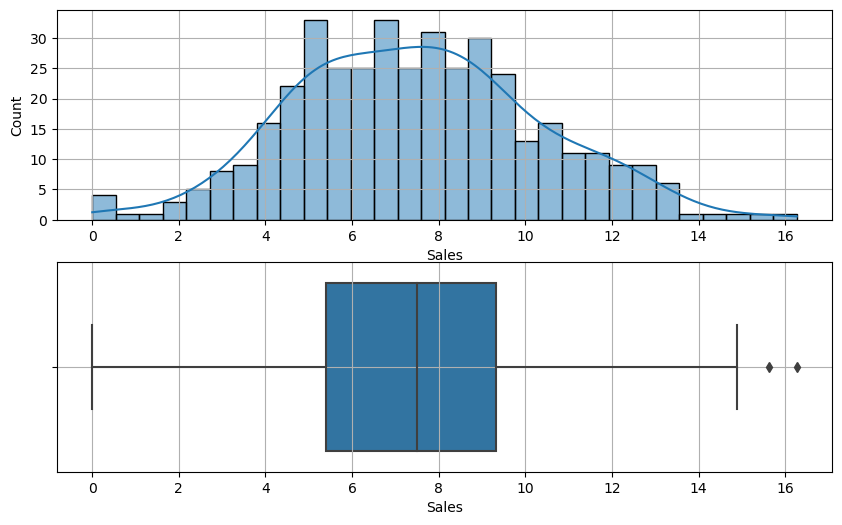

In [5]:
eda_1_num(data, var)

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 대부분의 판매량이 5천개 ~ 만개 사이

4) 추가 분석해 볼 사항이 있나요?

* 판매량 구간을 0 ~ 4천, 4천 ~ 1만, 1만 이상 으로 구분해서 분석해 볼 필요 있음.

### **(2) CompPrice**

In [6]:
var = 'CompPrice'

1) 변수의 비즈니스 의미

* 경쟁사 가격(단위 : 달러)

2) 기초통계량 및 분포확인

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
CompPrice,400.0,124.975,15.334512,77.0,115.0,125.0,135.0,175.0


<< 그래프 >>


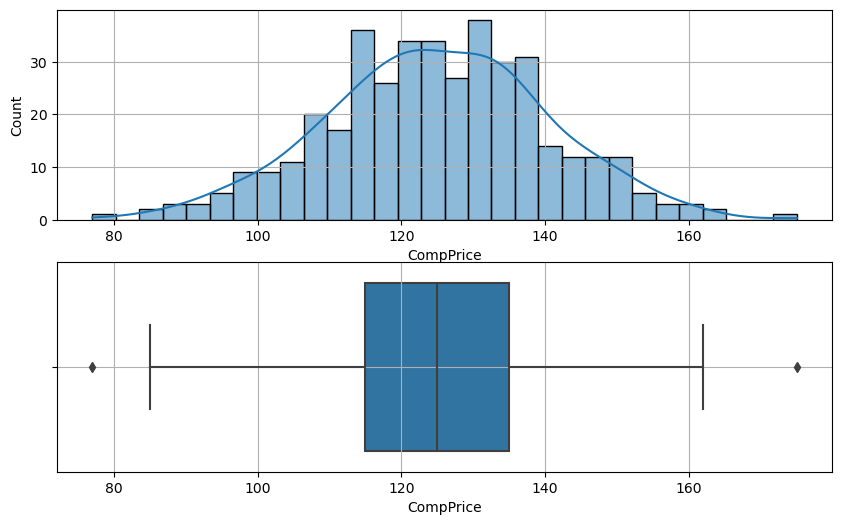

In [7]:
eda_1_num(data, var)

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 경쟁사 카시트 가격의 전체 범위는 77 ~  175달러
* 대체로, 115 ~ 135 달러로 형성됨.
* 제품 종류에 가격대가 차이가 있지 않을까? 


4) 추가 분석해 볼 사항이 있나요?

* 자사 가격과 비교 : 
    * 전체 분포 비교
    * 지역별 가격 비교

### **(3) Income**

In [38]:
var = 'Income'

1) 변수의 비즈니스 의미

* 지역 평균 소득(단위 : 1000달러)

2) 기초통계량 및 분포확인

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
Income,400.0,68.6575,27.986037,21.0,42.75,69.0,91.0,120.0


<< 그래프 >>


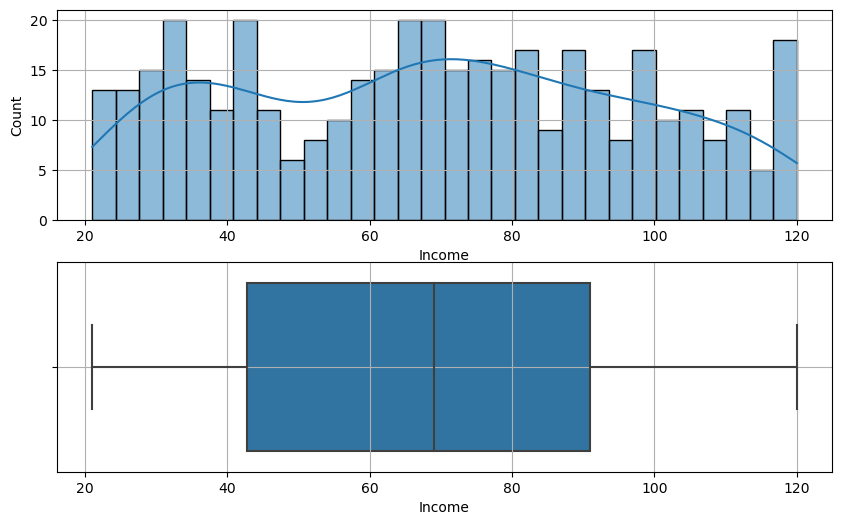

In [39]:
eda_1_num(data, var)

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 전 연령에 대한 인구별 평균 소득액? 성인에 대한 평균 소득액?
* 2만달러 ~ 12만 달러 이므로 연간 소득일 것.
* 50%가 약 4만달러 ~ 9만달러

4) 추가 분석해 볼 사항이 있나요?

* 평균 소득과 카시트 판매량과의 관계
* 평균 소득과 카시트 가격과의 관계

### **(4) Advertising**

In [40]:
var = 'Advertising'

1) 변수의 비즈니스 의미

* 각 지역, 회사의 광고 예산(단위 : 1000달러)

2) 기초통계량 및 분포확인

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
Advertising,400.0,6.635,6.650364,0.0,0.0,5.0,12.0,29.0


<< 그래프 >>


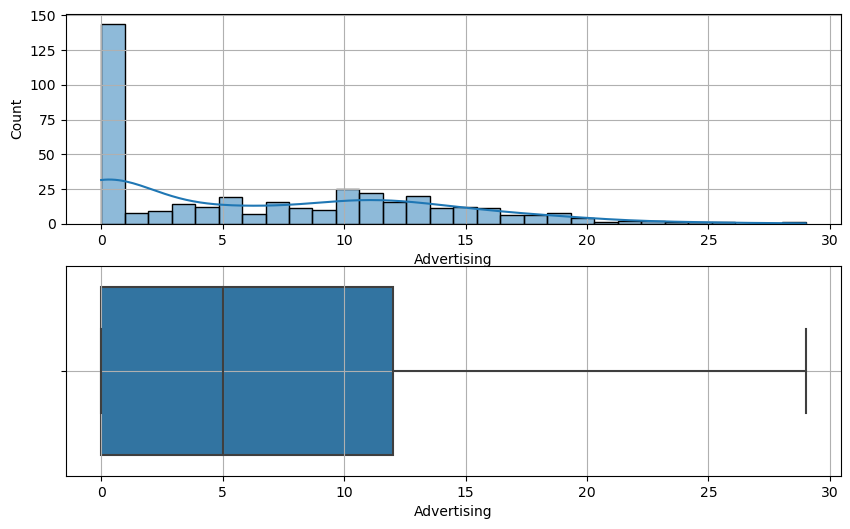

In [41]:
eda_1_num(data, var)

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 광고비 예산이 0 인 지역이 전체에 36%나 됨. 


4) 추가 분석해 볼 사항이 있나요?

* 광고비 예산 0을 제외하고 분포 확인 필요.

### **(5) Population**

In [42]:
var = 'Population'

1) 변수의 비즈니스 의미

* 지역 인구수(단위 : 1000명)

2) 기초통계량 및 분포확인

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
Population,400.0,264.84,147.376436,10.0,139.0,272.0,398.5,509.0


<< 그래프 >>


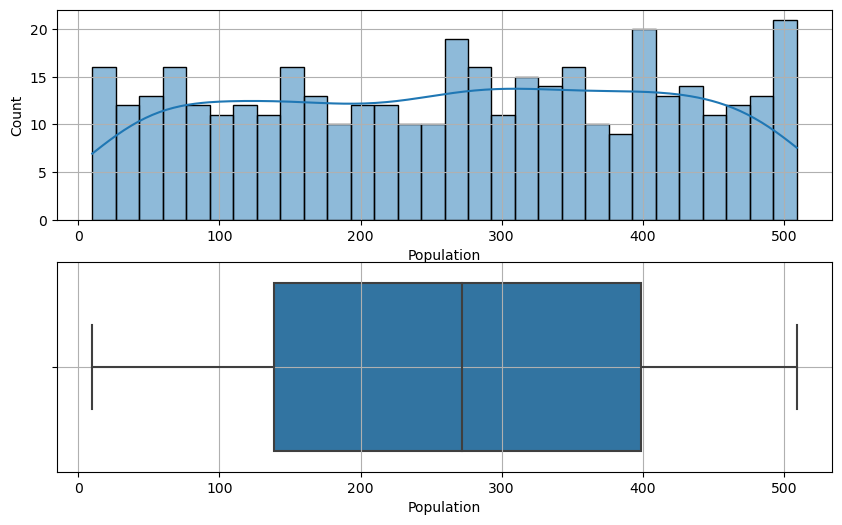

In [43]:
eda_1_num(data, var)

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 인구수가 거의 균등분포를 나타낸다. 왜?

4) 추가 분석해 볼 사항이 있나요?

* 인구수에 따른 판매량 관계
* 인구수와 평균연령의 관계

### **(6) Price**

In [44]:
var = 'Price'

1) 변수의 비즈니스 의미

* 자사 지역별 판매가격

2) 기초통계량 및 분포확인

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
Price,400.0,115.795,23.676664,24.0,100.0,117.0,131.0,191.0


<< 그래프 >>


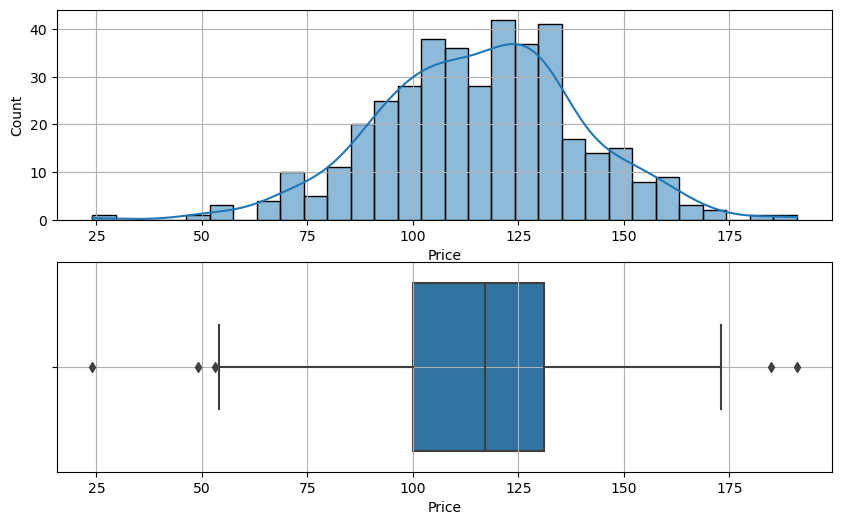

In [45]:
eda_1_num(data, var)

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 가격대가 24 ~ 191 달러로 경쟁사보다 범위가 넓다.
* 50%는 100 ~ 130 사이.

4) 추가 분석해 볼 사항이 있나요?

* 가격에 따라 판매량은 달라질까?
* 자사 가격과 경쟁사 가격 비교

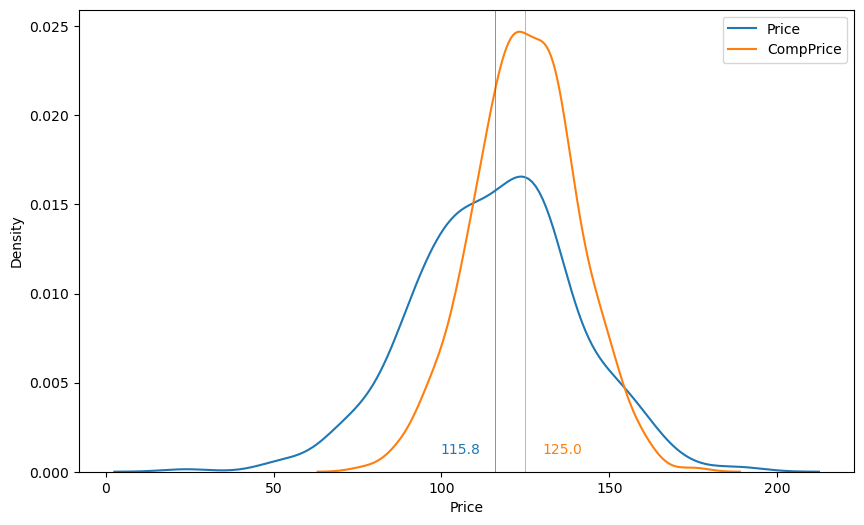

In [46]:
plt.figure(figsize = (10,6))
sns.kdeplot(data['Price'], label = 'Price')
sns.kdeplot(data['CompPrice'], label = 'CompPrice')

price_mean = round(np.mean(data['Price']),1)
com_mean = round(np.mean(data['CompPrice']),1)

plt.axvline(price_mean, color = 'C0', linewidth = .5)
plt.axvline(com_mean, color = 'C1', linewidth = .5)

plt.text(price_mean-16, 0.001, price_mean, color = 'C0')
plt.text(com_mean+5, 0.001, com_mean, color = 'C1')

plt.legend()
plt.show()

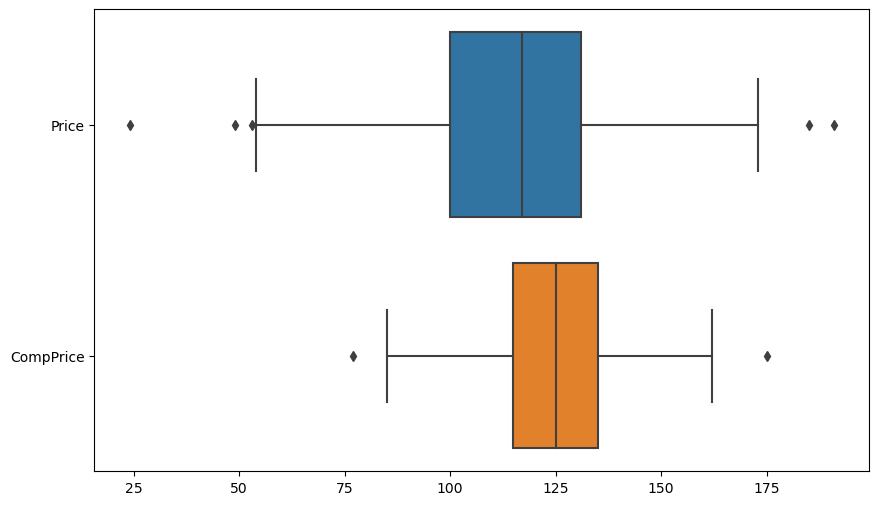

In [47]:
plt.figure(figsize = (10,6))
sns.boxplot(data=data[['Price','CompPrice']], orient="h")
plt.show()

### **(7) Age**

In [48]:
var = 'Age'

1) 변수의 비즈니스 의미

* 지역 인구의 평균 연령

2) 기초통계량 및 분포확인

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
Age,400.0,53.3225,16.200297,25.0,39.75,54.5,66.0,80.0


<< 그래프 >>


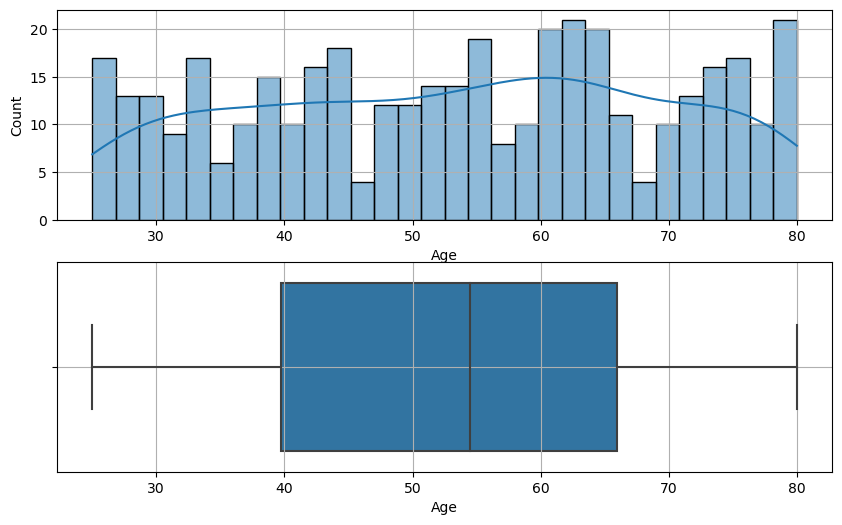

In [49]:
eda_1_num(data, var)

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 지역별 평균나이는 거의 균등분포로 보임.
* 균등분포 ==> 임의로 이렇게 모았거나, 여러 분포가 섞였거나, 이상치를 처리했거나...

* 평균나이
    * 지역 인구 전체에 대한 평균
    * 카시트가 필요한 사람은, 약 10세 이하 자녀를 둔 부모
    * 10세 이하 자녀들과 20대후반 ~ 40세의 부모가 주축인 인구의 평균 나이는?

4) 추가 분석해 볼 사항이 있나요?

* 가장 판매량이 높은 평균나이는?


## **4.단변량분석 : 범주형 변수**

* 함수 생성

In [50]:
def eda_1_cat(data, var) :
    t1 = data[var].value_counts()
    t2 = data[var].value_counts(normalize = True)
    t3 = pd.concat([t1, t2], axis = 1)
    t3.columns = ['count','ratio']
    display(t3)
    sns.countplot(x = var, data = data)
    plt.show()
    

### **(1) ShelveLoc**

In [51]:
var = 'ShelveLoc'

1) 변수의 비즈니스 의미

* 매장 진열상태

2) 기초통계량(수치화)

,count,ratio
Medium,219,0.5475
Bad,96,0.2400
Good,85,0.2125


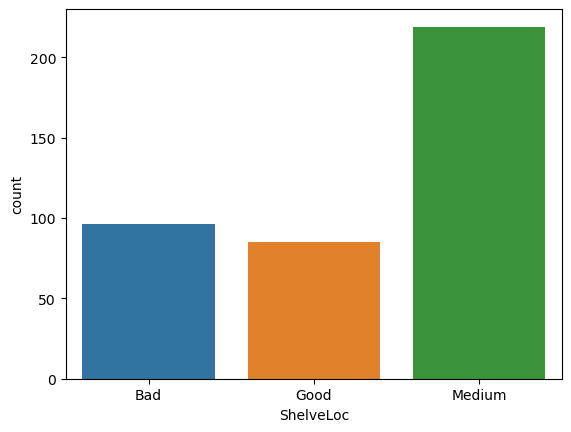

In [52]:
eda_1_cat(data, var)

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 진열 상태가 중간 정도 가 54%

4) 추가 분석해 볼 사항이 있나요?

* 진열상태에 따른 판매량 차이
* 지역, 인구수와 진열 상태 관계 비교

### **(2) Urban**

In [53]:
var = 'Urban'

1) 변수의 비즈니스 의미

* 도심 지역 여부

2) 기초통계량(수치화)

,count,ratio
Yes,282,0.705
No,118,0.295


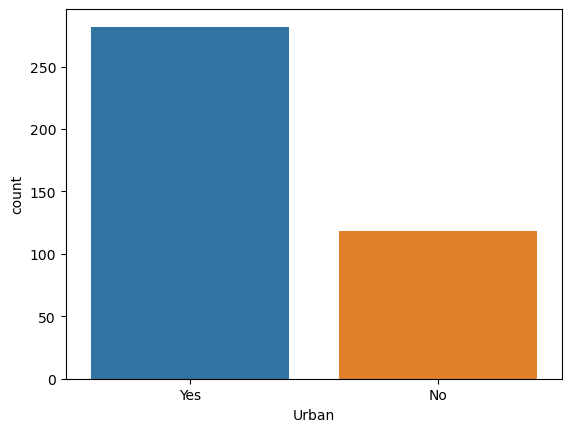

In [54]:
eda_1_cat(data, var)

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 약 70% 매장이 도시에 있음

4) 추가 분석해 볼 사항이 있나요?

* 도시와 지방의 인구수, 소득수준, 자사 가격, 경쟁사 가격, 광고예산, 판매량 비교 필요.

### **(3) US**

In [55]:
var = 'US'

1) 변수의 비즈니스 의미

* 매장이 미국에 있는지 여부

2) 기초통계량(수치화)

,count,ratio
Yes,258,0.645
No,142,0.355


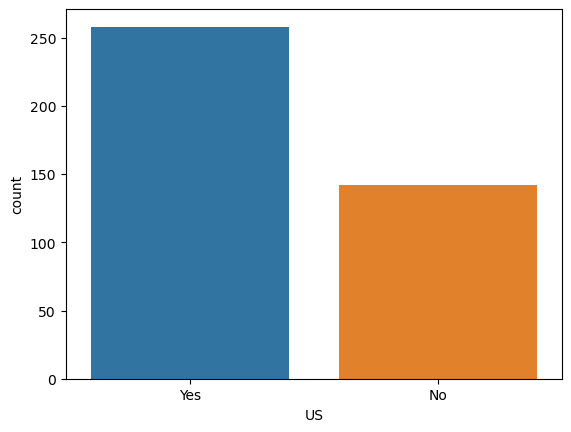

In [56]:
eda_1_cat(data, var)

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 약 65%가 국내(미국)

4) 추가 분석해 볼 사항이 있나요?

* 국내외 와 광고비, 판매가, 경쟁사가격, 매출액 등 비교